<a href="https://colab.research.google.com/github/NewtoNLN/BootCamp-ML/blob/main/Projeto_Final_Bootcamp_ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

###Carregar a base de dados
Abaixo iremos carregar a base de dados "Iris".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Obs: iremos considerar a variável de saída: **Iris-setosa**

In [ ]:
iris = pd.read_csv('iris.data', sep = ',', names = ['sepal length', 'sepal width', 'petal lengh', 'petal width', 'species'])
iris_values = iris.iloc[:, [0 ,1, 2, 3]].values

iris_values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

###Tratamento dos dados
Aplique a padronização nos dados

In [ ]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_values)
iris_scaled = pd.DataFrame(iris_scaled, columns= ['sepal length', 'sepal width', 'petal lengh', 'petal width'])
iris_scaled

,sepal length,sepal width,petal lengh,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


###Análise exploratória
Plote um gráfico de dispersão para identificar visualmente o número de grupos. Realize esse plot para cada par de atributos, de modo a obter a melhor visualização.

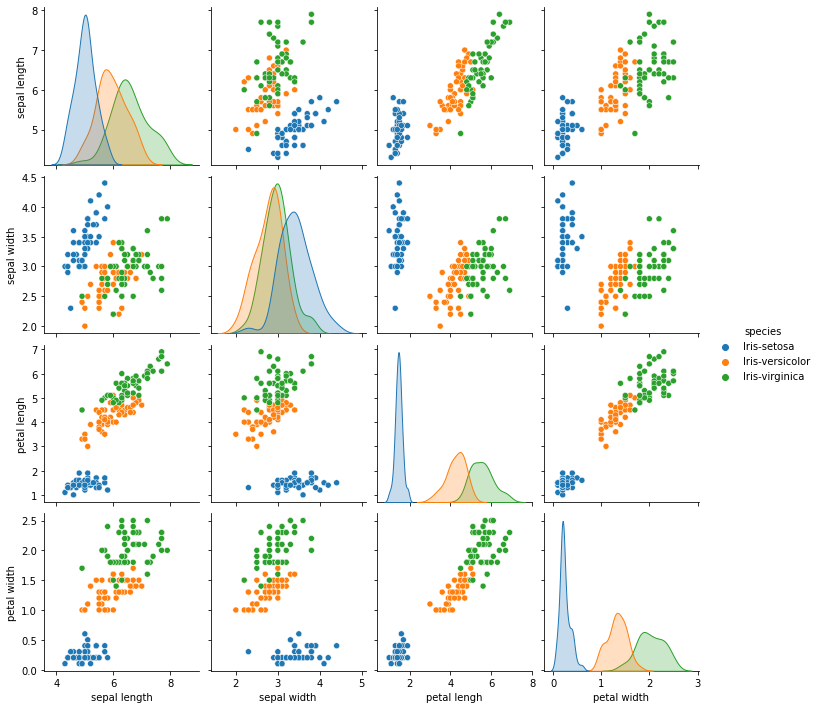

In [ ]:
sns.pairplot(iris, hue='species')

In [ ]:
iris_features = iris_scaled.iloc[:, [2,3]]
iris_features

,petal lengh,petal width
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977
...,...,...
145,0.819624,1.447956
146,0.705893,0.922064
147,0.819624,1.053537
148,0.933356,1.447956


Selecione as duas melhores features de acordo com as visualizações do passo anterior

###Método Elbow
Implemente o método elbow para encontrar o melhor número de grupos

*   Realize uma busca a partir de 2 grupos até 10
*   Utilize a inertia para avaliar a variação
*   Plote os valores da inertia em cada K

In [ ]:
def get_clustering_metric(X, k):
  model = KMeans(n_clusters=k, random_state=0).fit(X)
  return model.inertia_

O melhor valor de K encontrado é:  3


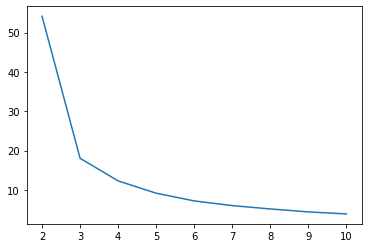

In [ ]:
n_clusters_possibles = [2, 3, 4, 5, 6, 7, 8, 9, 10]
values = []

for k in n_clusters_possibles:
  current_value = get_clustering_metric(iris_features, k)
  values.append(current_value)
min_value = 9999999999999
best_value = -1

for i in range(1, len(values)-1):
  x1 = values[i-1] - values[i]
  x2 = values[i] - values[i+1]
  x = x2/x1

  if x < min_value:
    min_value = x
    best_value = n_clusters_possibles[i]

print('O melhor valor de K encontrado é: ', best_value)

plt.plot(n_clusters_possibles, values)

### Execute o K-Means

Execute o k-means com o K escolhido de forma automática da etapa anterior

In [ ]:
%%time
model = KMeans(n_clusters=best_value, random_state=0).fit(iris_features)
print(model.cluster_centers_)

y_predict = model.labels_
print(y_predict.tolist())

[[-1.30487835 -1.25512862]
 [ 1.02813193  1.12749028]
 [ 0.30564587  0.16609419]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CPU times: user 54 ms, sys: 0 ns, total: 54 ms
Wall time: 40.5 ms


### Avaliação do K-Means
Imprima os índices da silhueta e NMI e plote o gráfico de dispersão com a saída do k-means

Obs: para calcular o NMI será necessário um tratamento para converter o tipo textual em numérico.

In [ ]:
y_true = iris['species'].astype('category').cat.codes
y_true

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

Silhueta:  0.6736179401065728
NMI:  0.8624853568628786


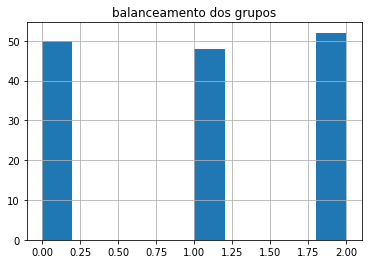

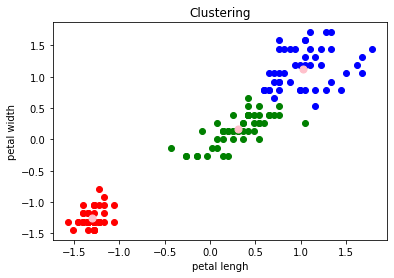

In [ ]:
sil = metrics.silhouette_score(iris_features, y_predict, metric='euclidean')
nmi = metrics.adjusted_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()

plt.scatter(iris_features.iloc[y_predict==0, 0], iris_features.iloc[y_predict==0, 1 ], c='red')
plt.scatter(iris_features.iloc[y_predict==1, 0], iris_features.iloc[y_predict==1, 1 ], c='blue')
plt.scatter(iris_features.iloc[y_predict==2, 0], iris_features.iloc[y_predict==2, 1 ], c='green')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='pink', label = 'Centroids')

plt.title('Clustering')
plt.xlabel('petal lengh')
plt.ylabel('petal width')
plt.show()